### Dataset

The Cambridge-driving Labeled Video Database (CamVid) is the first collection of videos with object class semantic labels, complete with metadata. The database provides ground truth labels that associate each pixel with one of 32 semantic classes.

http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/

In [2]:
from fastai.vision.all import *

In [3]:
import numpy as np

In [4]:
!pip list | grep fastai

fastai                                2.7.10


In [6]:
# download data

path = untar_data(URLs.CAMVID_TINY)

In [7]:
print(path/"codes.txt")

!ls -l /root/.fastai/data/camvid_tiny/

/root/.fastai/data/camvid_tiny/codes.txt
total 12
-rw-rw-r-- 1 jupyter 1000  313 Oct 30  2018 codes.txt
drwxrwxr-x 2 jupyter 1000 4096 Oct 30  2018 images
drwxrwxr-x 2 jupyter 1000 4096 Oct 30  2018 labels


In [8]:
data_loader = SegmentationDataLoaders.from_label_func(
    path,
    bs=8,
    fnames=get_image_files(path/"images"),
    label_func=lambda o: path/"labels"/f"{o.stem}_P{o.suffix}",
    codes=np.loadtxt(path/"codes.txt", dtype=str)
)

type(data_loader)

fastai.data.core.DataLoaders

In [10]:
# training

learner = unet_learner(data_loader, resnet34)
learner.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.265483,2.469248,00:02


epoch,train_loss,valid_loss,time
0,1.929162,1.534970,00:02
1,1.670597,1.425408,00:02
2,1.498194,1.087245,00:02
3,1.332860,0.868593,00:02
4,1.186733,0.790771,00:02
5,1.071428,0.758691,00:02
6,0.978965,0.754625,00:02
7,0.905608,0.750487,00:02


### Check results

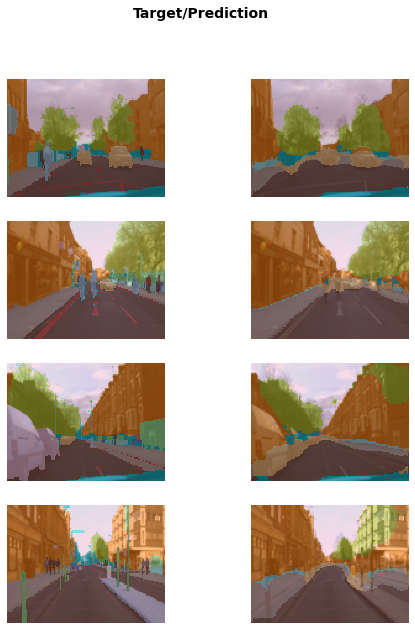

In [13]:
learner.show_results(max_n=4, figsize=(8,10))